# Hab Dishab mPFC signal issue

Answering random questions

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment
from bouts_extension import *


In [2]:
# NAc: #15616F
# mPFC: #FFAF00

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac_csvs"
# brain_region = '#15616F'

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc_csvs"
brain_region = '#FFAF00'

# experiment_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Hab Dishab/all/nac"
# csv_base_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Hab Dishab/all_csvs/nac_csvs"
# brain_region = '#15616F'

# experiment_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Hab Dishab/all/mpfc"
# csv_base_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Hab Dishab/all_csvs/mpfc_csvs"
# brain_region = '#FFAF00'


save_images = False

In [3]:
bout_definitions = [
    {'prefix': 's1', 'introduced': 's1_Introduced', 'removed': 's1_Removed'},
    {'prefix': 's2', 'introduced': 's2_Introduced', 'removed': 's2_Removed'}
]

In [4]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\pp4-250115-094555\Notes.txt
read from t=0s to t=1333.36s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\pp5-250114-053943\Notes.txt
read from t=0s to t=1325.51s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\pp6-250114-061037\Notes.txt
read from t=0s to t=1367.89s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\pp7-250114-070021\Notes.txt
read from t=0s to t=1353.06s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\pp8-250114-080316\Notes.txt
read from t=0s to t=1358.96s
Processing pp4-250115-094555...
Low-pass filtered @ 10.0 Hz
IRLS fit: DA ≃ -1.1425·ISOS + 294.7839
Processing pp5-2

In [5]:
# import pandas as pd
# # 
# # Extract data
# trial = experiment.trials['n6-240821-100116']
# # timestamps = trial.timestamps
# # da_signal = trial.updated_DA
# # isos_signal = trial.updated_ISOS

# da_signal = trial.streams['DA']
# isos_signal = trial.streams['ISOS']

# # Create DataFrame
# df = pd.DataFrame({
#     # 'Timestamps': timestamps,
#     'DA': da_signal,
#     'ISOS': isos_signal
# })

# # Save to CSV
# df.to_csv('n6-240821-100116_signals.csv', index=False)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_DA_and_ISOS_from_experiment(
    experiment,
    time_window: tuple = (0, 60),
    region:       str   = None,     # 'NAc', 'mPFC' or None
    figsize_per_trace: tuple = (12, 2),
    da_color:     str   = 'tab:blue',
    isos_color:   str   = 'tab:gray'
):
    """
    For each Trial in experiment.trials, plot its high-pass filtered DA
    and isosbestic traces between time_window[0] and time_window[1] seconds.

    experiment.trials should be a dict: {file_name: Trial, ...}
    Each Trial must have:
      - .timestamps     : 1D array of seconds
      - .updated_DA     : 1D array of the DA trace (high-pass or dFF)
      - .updated_ISOS   : 1D array of the isosbestic trace

    If `region` is 'NAc' or 'mPFC', it will only plot those whose
    Trial.subject_name startswith 'n' or 'p' respectively.
    """
    t0, t1 = time_window

    # collect trials, with optional region filter
    items = list(experiment.trials.items())
    if region is not None:
        prefix = 'n' if region=='NAc' else 'p'
        items = [(fn, tr) for fn, tr in items if tr.subject_name.startswith(prefix)]
    if not items:
        print("No trials to plot (check your region filter).")
        return

    # make one subplot per trial
    n = len(items)
    fig, axes = plt.subplots(n, 1,
                             figsize=(figsize_per_trace[0],
                                      figsize_per_trace[1]*n),
                             sharex=False)
    if n==1:
        axes = [axes]

    for ax, (fname, tr) in zip(axes, items):
        ts_full = np.asarray(tr.timestamps, dtype=float)
        da_full = np.asarray(tr.updated_DA,   dtype=float)
        iso_full= np.asarray(tr.updated_ISOS, dtype=float)

        # da_full = np.asarray(tr.streams['DA'],   dtype=float)
        # iso_full= np.asarray(tr.streams['ISOS'], dtype=float)

        # slice to window
        mask = (ts_full>=t0)&(ts_full<=t1)
        ts  = ts_full[mask]
        da  = da_full[mask]
        iso = iso_full[mask]

        ax.plot(ts, da,  color=da_color,  lw=1.5, label='DA')
        ax.plot(ts, iso, color=isos_color,lw=1.5, label='ISOS')

        ax.set_xlim(t0, t1)
        ax.set_ylabel("Signal", fontsize=9)
        ax.set_title(f"{fname} ({tr.subject_name})", fontsize=10)
        ax.legend(loc='upper right', fontsize=8)

    axes[-1].set_xlabel("Time (s)", fontsize=10)
    plt.tight_layout()
    plt.show()


In [7]:
# # plot 30→90 s of every NAc session, DA in blue and ISOS in gray
# plot_DA_and_ISOS_from_experiment(
#     experiment,

#     time_window=(30,1500),
#     region='mPFC',
#     figsize_per_trace=(10,1.5),
#     da_color='#15616F',
#     isos_color='#AAAAAA'
# )


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_raw_dff_from_experiment(
    experiment,
    time_window: tuple = (0, 60),
    region:       str   = None,    # 'NAc', 'mPFC', or None for all
    figsize_per_trace: tuple = (12, 2),
    color:        str   = 'black'
):
    """
    For each Trial in experiment.trials, plot its raw ΔF/F (trial.dFF)
    between time_window[0] and time_window[1] seconds.
    
    Parameters
    ----------
    experiment : your Reward_Competition instance
      Must have `experiment.trials` dict mapping file_name → Trial
    time_window : (t0, t1) in seconds
    region : 'NAc', 'mPFC', or None
      If specified, only trials whose trial.subject_name startswith 'n' (NAc)
      or 'p' (mPFC) will be shown.
    figsize_per_trace : (width, height) per subplot row
    color : line color for ΔF/F
    """
    t0, t1 = time_window

    # 1) assemble the list of (name, trial) pairs, with optional region filter
    all_trials = list(experiment.trials.items())
    if region is not None:
        prefix = 'n' if region == 'NAc' else 'p'
        all_trials = [
            (name, tr) for name, tr in all_trials
            if tr.subject_name.startswith(prefix)
        ]
    if not all_trials:
        print("No trials to plot (region filter may be too strict).")
        return

    # 2) set up subplots: one row per trial
    n = len(all_trials)
    fig, axes = plt.subplots(n, 1,
                             figsize=(figsize_per_trace[0],
                                      figsize_per_trace[1]*n),
                             sharex=False)
    if n == 1:
        axes = [axes]

    # 3) loop and plot
    for ax, (fname, tr) in zip(axes, all_trials):
        # get timestamps and raw dFF
        ts_full = np.asarray(tr.timestamps, dtype=float)
        # replace `tr.dFF` with the correct attribute if yours differs
        dff_full = np.asarray(tr.dFF, dtype=float)

        # mask to the desired window
        mask = (ts_full >= t0) & (ts_full <= t1)
        ts = ts_full[mask]
        dff = dff_full[mask]

        ax.plot(ts, dff, color=color, lw=1)
        ax.set_xlim(t0, t1)
        ax.set_ylabel("ΔF/F", fontsize=9)
        ax.set_title(f"{fname} ({tr.subject_name})", fontsize=10)

    axes[-1].set_xlabel("Time (s)", fontsize=10)
    plt.tight_layout()
    plt.show()


In [9]:
# # plot 0→120 s of every mPFC session in blue:
# plot_raw_dff_from_experiment(
#     experiment,                 # your Reward_Competition instance
#     time_window=(40, 1200),
#     region="mPFC",
#     color="tab:blue",
#     figsize_per_trace=(10, 1.5)
# )


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def detect_spontaneous_events(
    timestamps: np.ndarray,
    signal: np.ndarray,
    threshold_factor: float = 3.0,
    min_distance_s: float = 1.0,
    min_width_s:    float = 0.5
):
    """
    Detect peaks using a MAD‐threshold, plus minimum inter-peak interval
    and minimum peak width.
    """
    med = np.median(signal)
    mad = np.median(np.abs(signal - med))
    thresh = med + threshold_factor * mad

    dt = np.median(np.diff(timestamps))
    min_dist = int(np.round(min_distance_s / dt))
    min_w    = int(np.round(min_width_s    / dt))

    peaks, props = find_peaks(
        signal,
        height=thresh,
        distance=min_dist,
        width=min_w
    )
    return timestamps[peaks], signal[peaks]


def plot_DA_ISOS_and_dFF_with_peaks(
    experiment,
    time_window:       tuple = (0, 60),
    region:            str   = None,       # 'NAc', 'mPFC' or None
    figsize_per_trial: tuple = (12, 4),
    da_color:          str   = 'tab:blue',
    isos_color:        str   = 'tab:gray',
    dff_color:         str   = 'tab:green',
    peak_color:        str   = 'red',
    threshold_factor:  float = 3.0,
    min_distance_s:    float = 1.0,
    min_width_s:       float = 0.5
):
    """
    Two‐panel per trial: high-pass DA & ISOS (top), raw dF/F (bottom);
    automatically detect peaks in dF/F and draw vertical lines at each peak.
    """
    t0, t1 = time_window

    # gather & optionally filter by region
    items = list(experiment.trials.items())
    if region is not None:
        prefix = 'n' if region=='NAc' else 'p'
        items = [(fn,tr) for fn,tr in items
                 if hasattr(tr,'subject_name') and tr.subject_name.startswith(prefix)]
    if not items:
        print("No trials to plot.")
        return

    for fname, tr in items:
        ts_full  = np.asarray(tr.timestamps,    dtype=float)
        da_full  = np.asarray(tr.updated_DA,    dtype=float)
        iso_full = np.asarray(tr.isosbestic_fitted,  dtype=float)
        # da_full  = np.asarray(tr.streams['DA'],    dtype=float)
        # iso_full = np.asarray(tr.streams['ISOS'],  dtype=float)
        # dff_full = np.asarray(tr.zscore,           dtype=float)
        dff_full = np.asarray(tr.dFF,           dtype=float)


        mask = (ts_full>=t0)&(ts_full<=t1)
        ts, da, iso, dff = ts_full[mask], da_full[mask], iso_full[mask], dff_full[mask]

        # detect peaks on the dF/F
        peak_ts, peak_amps = detect_spontaneous_events(
            ts, dff,
            threshold_factor=threshold_factor,
            min_distance_s=min_distance_s,
            min_width_s=min_width_s
        )

        # plot
        fig, (ax1, ax2) = plt.subplots(
            2,1, sharex=True,
            figsize=(figsize_per_trial[0],
                     figsize_per_trial[1]*2)
        )

        # top: DA & ISOS
        ax1.plot(ts, da,  color=da_color,  lw=1.5, label='DA (HP)')
        ax1.plot(ts, iso, color=isos_color, lw=1.5, label='ISOS (HP)')
        ax1.set_ylabel("Signal")
        ax1.legend(fontsize=8)

        # bottom: dF/F + peaks
        ax2.plot(ts, dff, color=dff_color, lw=1.5, label='ΔF/F')
        ax2.set_ylabel("dF/F")
        ax2.legend(fontsize=8)

        # vertical lines at each detected peak
        for tpk in peak_ts:
            ax1.axvline(tpk, color=peak_color, ls='--', lw=1, alpha=0.3)
            ax2.axvline(tpk, color=peak_color, ls='--', lw=1, alpha=0.3)

        ax2.set_xlabel("Time (s)")
        ax1.set_title(f"{fname} ({tr.subject_name})")

        plt.tight_layout()
        plt.show()

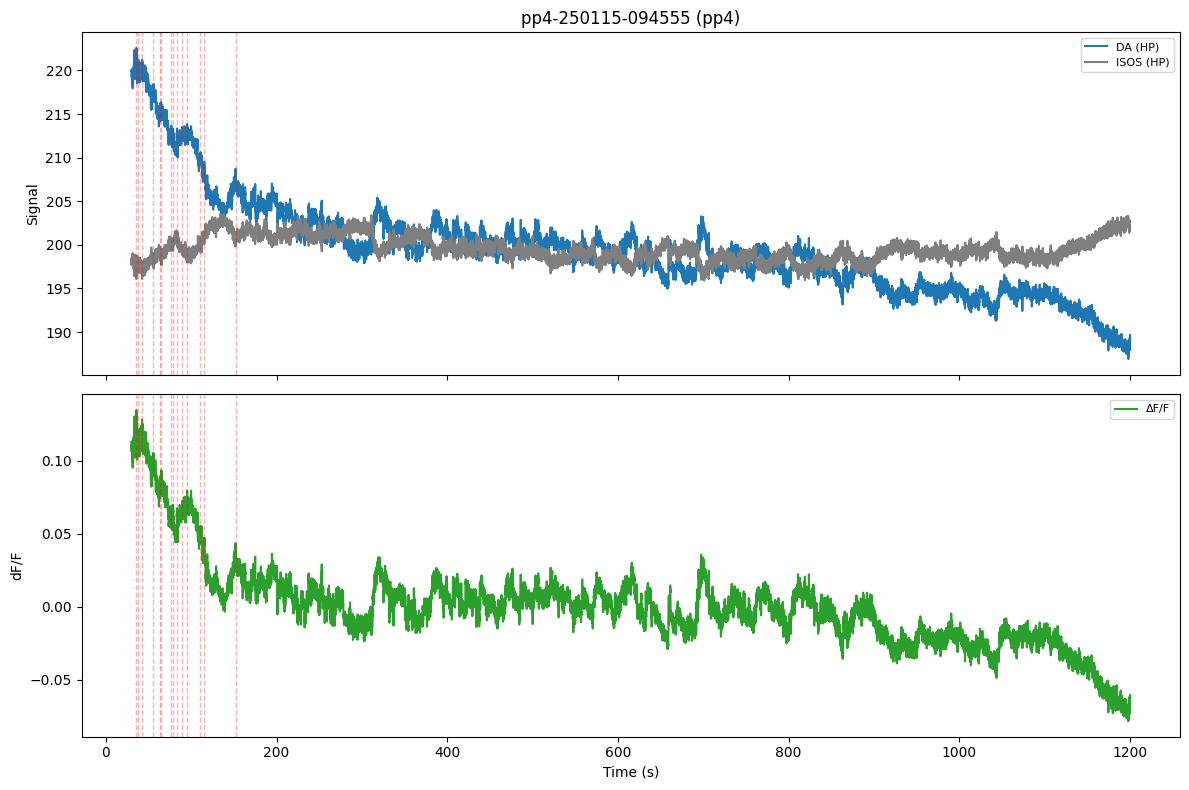

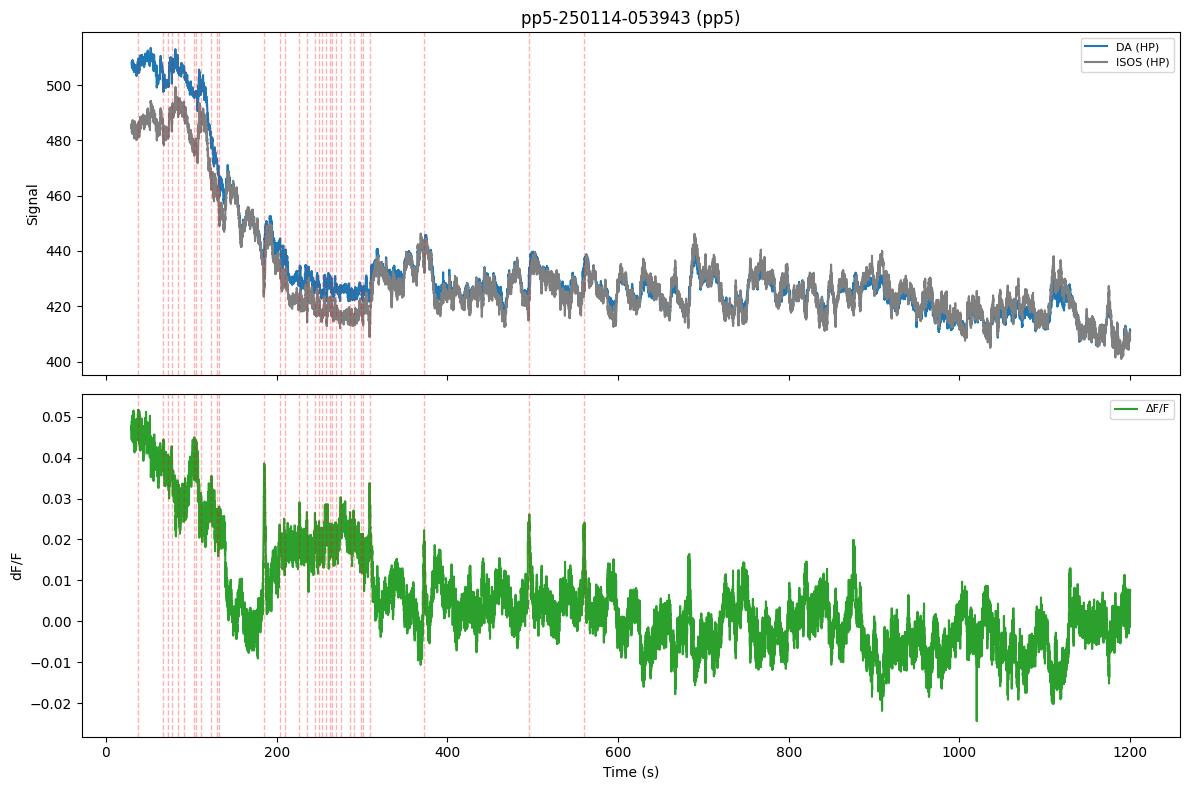

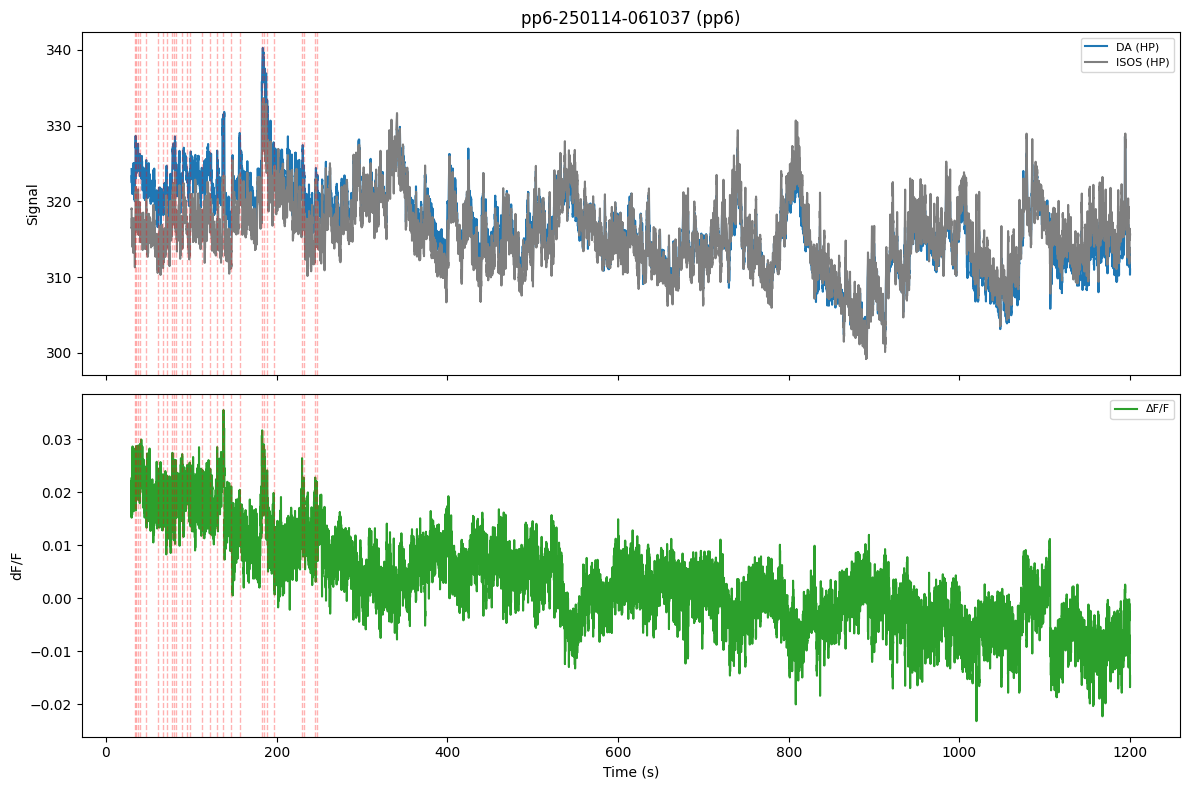

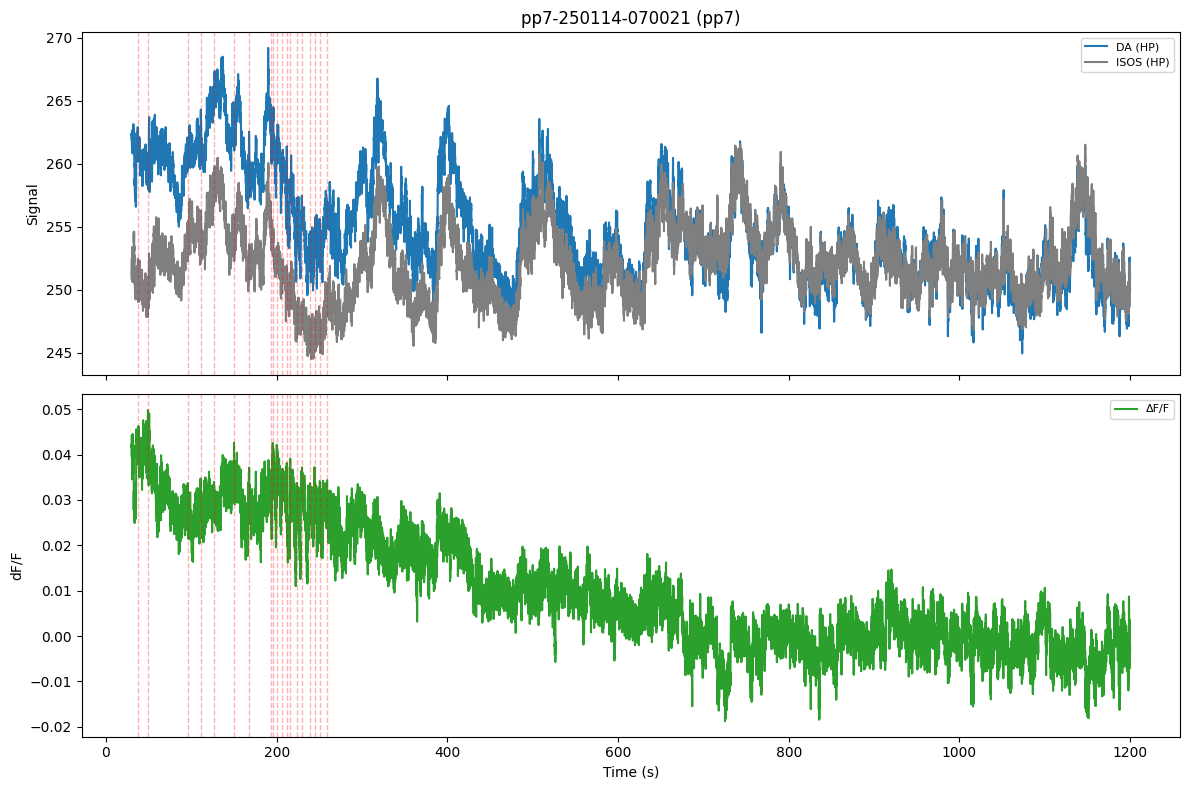

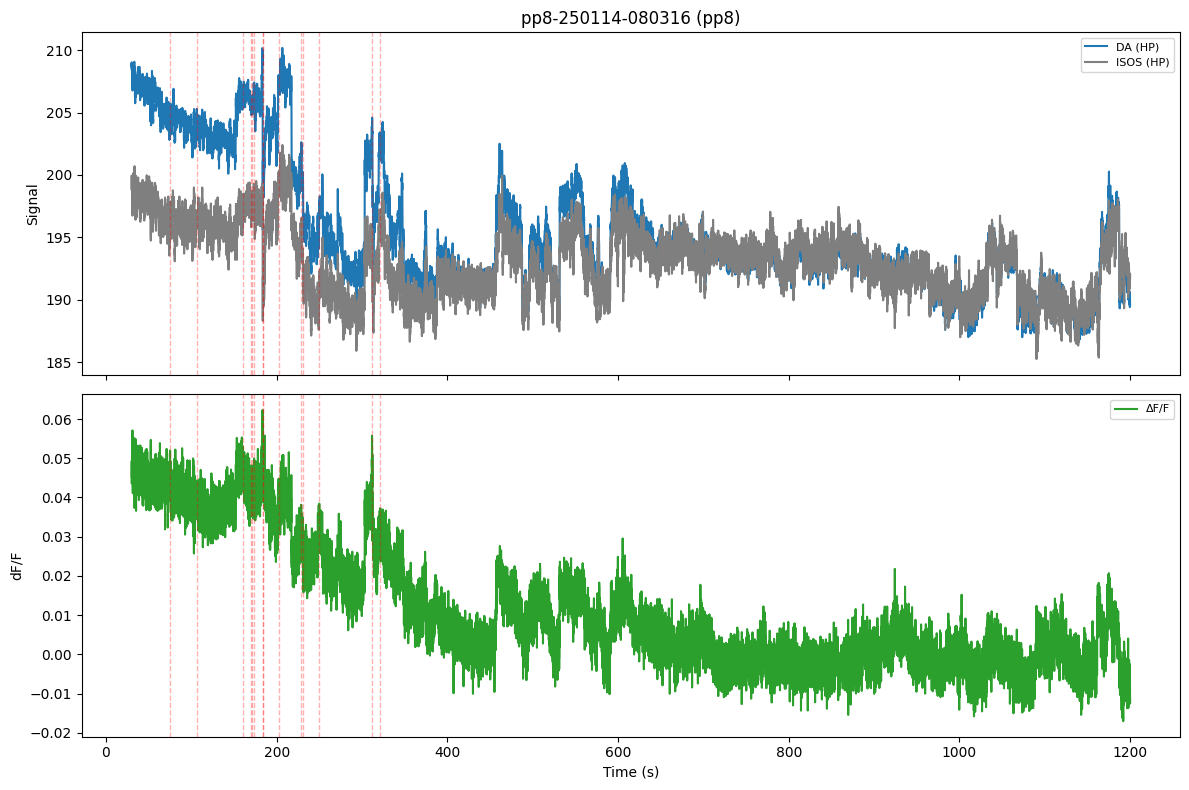

In [11]:
plot_DA_ISOS_and_dFF_with_peaks(
    experiment,
    time_window=(0, 1200),
    region='mPFC',
    threshold_factor=3.0,

    min_distance_s=1.0,
    min_width_s=0.5
)
